## Heart signal information - First method 


In this first method, the [HeartPy](https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/index.html) library is used to display all the information related to the heart signal loaded from the database.

This library is capable of displaying multiple information about it using various ways of processing the signal. The result of this notebook is only one of them (the default way).

The necessary libraries are imported and a random number generator is created.

In [2]:
import pandas as pd
import numpy as np
import ast
import wfdb
import matplotlib.pyplot as plt
import heartpy as hp
import ecg_plot
import os
import glob

import warnings
warnings.filterwarnings('ignore')

# Create random generator with its seed
rng = np.random.default_rng(123)

Using second method of reading databases

In [3]:
# Setup data variables
db_path = '../data/physionet.org/files/ptb-xl/1.0.2/records'
sampling_rate = 100 # Sampling rate of the signal (100 or 500)
path = db_path + str(sampling_rate) + "/" # Complete path

# Check that the folder exists
try:
    folder_exists = os.path.exists(path)
    if not folder_exists: 
        raise FileNotFoundError()
except FileNotFoundError:
    print("Folder " + path + " does not exists!")

# Store all data paths
data = []
for f in glob.glob(path + '/**/*.dat', recursive=True):
    data.append(f.split(".dat")[0]) # Remove extension from path

Random database is selected

In [10]:
# Select random data file
data_path = data[rng.integers(low=0, high=len(data))]
print ("Selected: " + str(data_path.split("1.0.2/")[1]))

Gets all signal data using the [wfdb library](https://wfdb.readthedocs.io/en/latest/)

In [11]:
# Read a WFDB header file and return a Record or MultiRecord object with the record descriptors as attributes
header = wfdb.rdheader(data_path, pn_dir=None, rd_segments=False)

# Load the WFDB record and the physical samples
record = wfdb.rdrecord(data_path)

# Read a WFDB record, and return the physical signals and a few important descriptor fields.
sig, fields = wfdb.rdsamp(data_path)

The [HeartPy](https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/index.html) library is used to process the signal and get all the important information. 

The default parameters have been used. It is possible that using other channels may not provide the most appropriate information.

bpm: 155.844156
ibi: 385.000000
sdnn: 208.806130
sdsd: 110.706820
rmssd: 368.998645
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 60.000000
sd1: 253.392975
sd2: 139.756932
s: 111254.555187
sd1/sd2: 1.813098
breathingrate: 0.324675


<Figure size 1296x432 with 0 Axes>

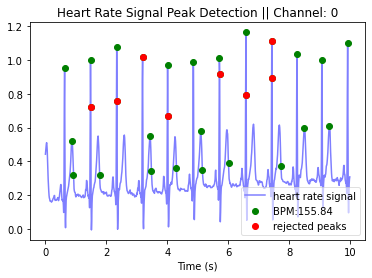

In [12]:
# Select one (first by default) channel from data
channel = 0

# Process signal
wd, m = hp.process(sig[:,channel], header.fs)

# Visualise in plot of custom size
plt.figure(figsize=(18,6))
hp.plotter(wd, m, title='Heart Rate Signal Peak Detection || Channel: ' + str(channel))

# Display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))